# Simple gradient descent method used to find function minimum

In [13]:
%matplotlib inline
from typing import Callable, Tuple
import matplotlib.pyplot as plt
import numpy as np

##  Functions

\begin{equation}
f(\textbf{x})=x_1^2+x_2^2
\end{equation}

\begin{equation}
g(x) = 1.5-\exp \left\{-x_1^2-x_2^2\right\}-0.5 \exp \left\{-\left(x_1-1\right)^2-\left(x_2+2\right)^2\right\}
\end{equation}

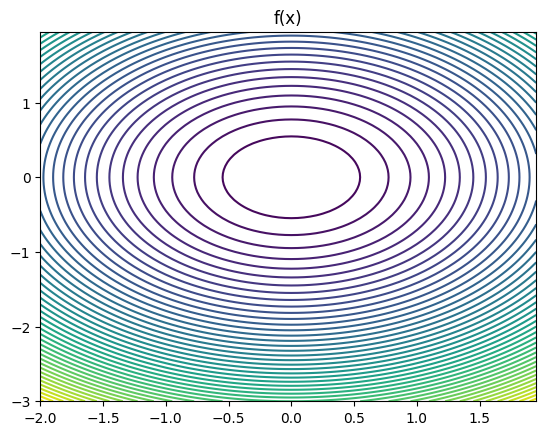

In [14]:
# Function to analyze
X = np.arange(-2, 2, 0.05)
Y = np.arange(-3, 2, 0.05)
X, Y = np.meshgrid(X, Y)
Z = X**2 + Y**2 

# Contour plot en 2D
plt.figure()
plt.title("f(x)")
plt.contour(X, Y, Z, 50)

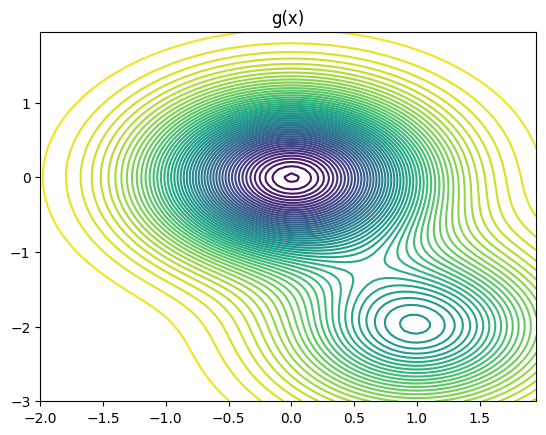

In [15]:
X = np.arange(-2, 2, 0.05)
Y = np.arange(-3, 2, 0.05)
X, Y = np.meshgrid(X, Y)
Z =1.5-np.exp(-X**(2)-Y**(2))-0.5*np.exp(-(X-1)**(2)-(Y+2)**(2))
# Contour plot en 2D

plt.figure()
plt.title("g(x)")
plt.contour(X, Y, Z, 50)

Gradients
\begin{equation}
\nabla f(x)=
\begin{bmatrix}
2x_1 \\
2x_2
\end{bmatrix}
\end{equation}

\begin{equation}
\nabla g(x)=
\begin{bmatrix}
2 x_1 \exp \left\{-x_1^2-x_2^2\right\}+\left(x_1-1\right) \exp \left\{-\left(x_1-1\right)^2-\left(x_2+2\right)^2\right\} \\
2 x_2 \exp \left\{-x_1^2-x_2^2\right\}+\left(x_2+2\right) \exp \left\{-\left(x_1-1\right)^2-\left(x_2+2\right)^2\right\}
\end{bmatrix}
\end{equation}

In [16]:
class SimpleGradientDescent:
    # Grid for plotting the function
    X = np.arange(-2, 2, 0.05)
    Y = np.arange(-3, 2, 0.05)
    X, Y = np.meshgrid(X, Y)

    def __init__(
        self,
        func: Callable[[float, float], float],
        grad_func: Callable[[float, float], Tuple[float, float]],
        alpha: float = 0.1,
    ):
        self.alpha = alpha
        self.func = func
        self.grad_func = grad_func
        self.trace = []  # Trace of the points visited during the search
    
    def set_alpha(self, alpha: float):
        """Set the learning rate for gradient descent."""
        self.alpha = alpha

    def _calc_Z_value(self):
        """Calculate the Z values for contour plotting based on X and Y."""
        self.Z = self.func(self.X, self.Y)

    def plot_func(self):
        """Plot the contour of the function and the optimization trace if available."""
        self._calc_Z_value()
        plt.figure()
        plt.contour(self.X, self.Y, self.Z, 50)
        if len(self.trace) > 0:
            trace = np.array(self.trace)
            plt.scatter(trace[:, 0], trace[:, 1], s=10, c='r')
        plt.xlabel('X1')
        plt.ylabel('X2')
        plt.show()

    def calculate_func_vale(self, x1: float, x2: float) -> float:
        """Calculate the value of the function at (x1, x2)."""
        return self.func(x1, x2)

    def calculate_func_grad(self, x1: float, x2: float) -> Tuple[float, float]:
        """Calculate the gradient of the function at (x1, x2)."""
        return self.grad_func(x1, x2)

    def gradient_descent_step(self, x1: float, x2: float) -> Tuple[float, float]:
        """Perform a single step of gradient descent and return the new point."""
        grad_x1, grad_x2 = self.calculate_func_grad(x1, x2)
        new_x1 = x1 - self.alpha * grad_x1
        new_x2 = x2 - self.alpha * grad_x2
        return new_x1, new_x2

    def minimize(
        self,
        x1_init: float,
        x2_init: float,
        steps: int,
        verbose: int = 0,
        plot: bool = False,
    ) -> float:
        """Run gradient descent for a given number of steps and return the final minimum value."""
        x1, x2 = x1_init, x2_init
        self.trace = [(x1, x2)]  # Initialize the trace with the starting point

        for step in range(steps):
            x1, x2 = self.gradient_descent_step(x1, x2)
            self.trace.append((x1, x2))

            if verbose > 0 and step % verbose == 0:
                func_value = self.calculate_func_vale(x1, x2)
                print(f"Step {step}: x1 = {x1:.4f}, x2 = {x2:.4f}, f(x1, x2) = {func_value:.4f}")

        if plot:
            self.plot_func()

        # Return the final value of the function
        return self.calculate_func_vale(x1, x2)


# Solution

## First function

In [17]:
Example1 = SimpleGradientDescent(func=lambda x1, x2: x1**2 + x2**2, grad_func=lambda x1, x2: (2*x1, 2*x2), alpha=0.1)

Step 0: x1 = 0.8096, x2 = -0.4564, f(x1, x2) = 0.8638
Step 1: x1 = 0.7934, x2 = -0.4473, f(x1, x2) = 0.8296
Step 2: x1 = 0.7775, x2 = -0.4384, f(x1, x2) = 0.7967
Step 3: x1 = 0.7620, x2 = -0.4296, f(x1, x2) = 0.7652
Step 4: x1 = 0.7467, x2 = -0.4210, f(x1, x2) = 0.7349
Step 5: x1 = 0.7318, x2 = -0.4126, f(x1, x2) = 0.7058
Step 6: x1 = 0.7172, x2 = -0.4043, f(x1, x2) = 0.6778
Step 7: x1 = 0.7028, x2 = -0.3963, f(x1, x2) = 0.6510
Step 8: x1 = 0.6888, x2 = -0.3883, f(x1, x2) = 0.6252
Step 9: x1 = 0.6750, x2 = -0.3806, f(x1, x2) = 0.6004
Step 10: x1 = 0.6615, x2 = -0.3730, f(x1, x2) = 0.5767
Step 11: x1 = 0.6483, x2 = -0.3655, f(x1, x2) = 0.5538
Step 12: x1 = 0.6353, x2 = -0.3582, f(x1, x2) = 0.5319
Step 13: x1 = 0.6226, x2 = -0.3510, f(x1, x2) = 0.5108
Step 14: x1 = 0.6101, x2 = -0.3440, f(x1, x2) = 0.4906
Step 15: x1 = 0.5979, x2 = -0.3371, f(x1, x2) = 0.4712
Step 16: x1 = 0.5860, x2 = -0.3304, f(x1, x2) = 0.4525
Step 17: x1 = 0.5743, x2 = -0.3238, f(x1, x2) = 0.4346
Step 18: x1 = 0.5628

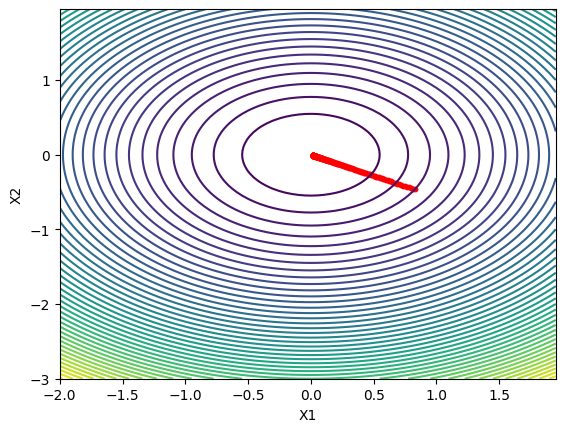

0.0002782122796219469

In [18]:
Example1.set_alpha(0.01)
Example1.minimize(np.random.uniform(-2, 2), np.random.uniform(-3, 2), steps=200, verbose=1, plot=True)

Step 0: x1 = 0.8372, x2 = 1.3970, f(x1, x2) = 2.6525
Step 1: x1 = 0.6698, x2 = 1.1176, f(x1, x2) = 1.6976
Step 2: x1 = 0.5358, x2 = 0.8941, f(x1, x2) = 1.0865
Step 3: x1 = 0.4287, x2 = 0.7153, f(x1, x2) = 0.6953
Step 4: x1 = 0.3429, x2 = 0.5722, f(x1, x2) = 0.4450
Step 5: x1 = 0.2743, x2 = 0.4578, f(x1, x2) = 0.2848
Step 6: x1 = 0.2195, x2 = 0.3662, f(x1, x2) = 0.1823
Step 7: x1 = 0.1756, x2 = 0.2930, f(x1, x2) = 0.1167
Step 8: x1 = 0.1405, x2 = 0.2344, f(x1, x2) = 0.0747
Step 9: x1 = 0.1124, x2 = 0.1875, f(x1, x2) = 0.0478


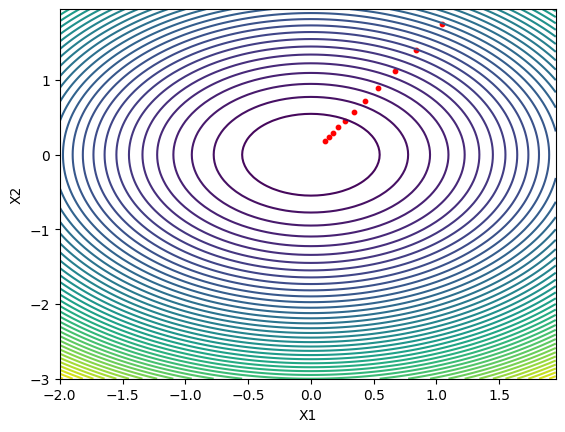

0.04778393458360698

In [19]:
Example1.set_alpha(0.1)
Example1.minimize(np.random.uniform(-2, 2), np.random.uniform(-3, 2), steps=10, verbose=1, plot=True)

Step 0: x1 = 0.0000, x2 = 0.0000, f(x1, x2) = 0.0000
Step 1: x1 = 0.0000, x2 = 0.0000, f(x1, x2) = 0.0000
Step 2: x1 = 0.0000, x2 = 0.0000, f(x1, x2) = 0.0000
Step 3: x1 = 0.0000, x2 = 0.0000, f(x1, x2) = 0.0000
Step 4: x1 = 0.0000, x2 = 0.0000, f(x1, x2) = 0.0000
Step 5: x1 = 0.0000, x2 = 0.0000, f(x1, x2) = 0.0000
Step 6: x1 = 0.0000, x2 = 0.0000, f(x1, x2) = 0.0000
Step 7: x1 = 0.0000, x2 = 0.0000, f(x1, x2) = 0.0000
Step 8: x1 = 0.0000, x2 = 0.0000, f(x1, x2) = 0.0000
Step 9: x1 = 0.0000, x2 = 0.0000, f(x1, x2) = 0.0000


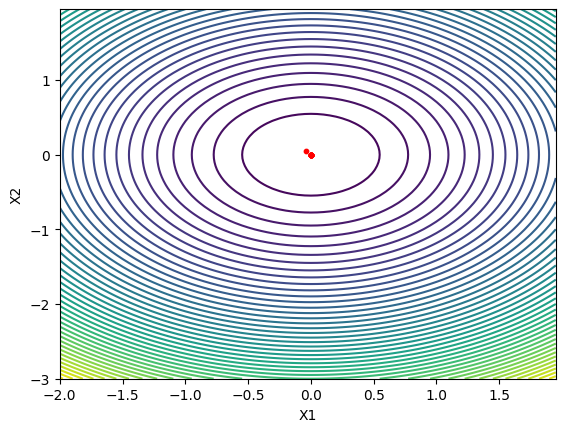

0.0

In [20]:
Example1.set_alpha(0.5)
Example1.minimize(np.random.uniform(-2, 2), np.random.uniform(-3, 2), steps=10, verbose=1, plot=True)

## Second function

In [21]:
Example2 = SimpleGradientDescent(func=lambda x1, x2: 1.5-np.exp(-x1**(2)-x2**(2))-0.5*np.exp(-(x1-1)**(2)-(x2+2)**(2)),
                                  grad_func=lambda x1, x2: (2*x1*np.exp(-x1**(2)-x2**(2))+2*(x1-1)*np.exp(-(x1-1)**(2)-(x2+2)**(2)), 2*x2*np.exp(-x1**(2)-x2**(2))+2*(x2+2)*np.exp(-(x1-1)**(2)-(x2+2)**(2))), alpha=0.1)

Step 0: x1 = 1.6203, x2 = -0.8692, f(x1, x2) = 1.3713
Step 1: x1 = 1.6169, x2 = -0.8729, f(x1, x2) = 1.3699
Step 2: x1 = 1.6134, x2 = -0.8766, f(x1, x2) = 1.3685
Step 3: x1 = 1.6099, x2 = -0.8804, f(x1, x2) = 1.3671
Step 4: x1 = 1.6064, x2 = -0.8841, f(x1, x2) = 1.3657
Step 5: x1 = 1.6029, x2 = -0.8880, f(x1, x2) = 1.3642
Step 6: x1 = 1.5993, x2 = -0.8919, f(x1, x2) = 1.3628
Step 7: x1 = 1.5958, x2 = -0.8958, f(x1, x2) = 1.3613
Step 8: x1 = 1.5922, x2 = -0.8997, f(x1, x2) = 1.3598
Step 9: x1 = 1.5886, x2 = -0.9037, f(x1, x2) = 1.3583
Step 10: x1 = 1.5849, x2 = -0.9077, f(x1, x2) = 1.3567
Step 11: x1 = 1.5813, x2 = -0.9118, f(x1, x2) = 1.3551
Step 12: x1 = 1.5776, x2 = -0.9159, f(x1, x2) = 1.3536
Step 13: x1 = 1.5739, x2 = -0.9200, f(x1, x2) = 1.3519
Step 14: x1 = 1.5702, x2 = -0.9242, f(x1, x2) = 1.3503
Step 15: x1 = 1.5665, x2 = -0.9284, f(x1, x2) = 1.3486
Step 16: x1 = 1.5628, x2 = -0.9327, f(x1, x2) = 1.3470
Step 17: x1 = 1.5590, x2 = -0.9370, f(x1, x2) = 1.3453
Step 18: x1 = 1.5552

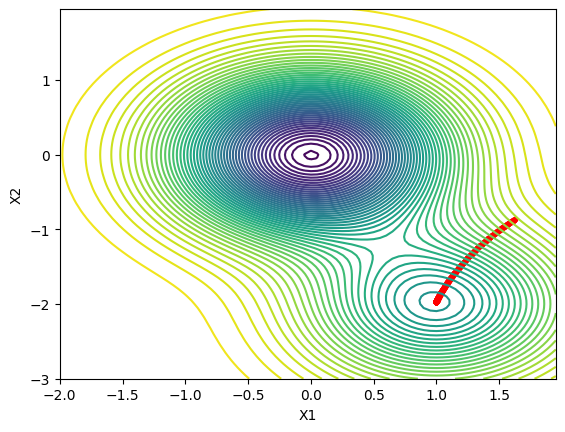

np.float64(0.9928056664706228)

In [22]:
Example2.set_alpha(0.01)
Example2.minimize(np.random.uniform(-2, 2), np.random.uniform(-3, 2), steps=300, verbose=1, plot=True)

Step 0: x1 = 0.6787, x2 = -0.4500, f(x1, x2) = 0.9440
Step 1: x1 = 0.6140, x2 = -0.4289, f(x1, x2) = 0.8928
Step 2: x1 = 0.5496, x2 = -0.4029, f(x1, x2) = 0.8396
Step 3: x1 = 0.4862, x2 = -0.3726, f(x1, x2) = 0.7857
Step 4: x1 = 0.4250, x2 = -0.3391, f(x1, x2) = 0.7331
Step 5: x1 = 0.3670, x2 = -0.3037, f(x1, x2) = 0.6842
Step 6: x1 = 0.3133, x2 = -0.2681, f(x1, x2) = 0.6408
Step 7: x1 = 0.2647, x2 = -0.2336, f(x1, x2) = 0.6043
Step 8: x1 = 0.2217, x2 = -0.2015, f(x1, x2) = 0.5751
Step 9: x1 = 0.1845, x2 = -0.1724, f(x1, x2) = 0.5527
Step 10: x1 = 0.1529, x2 = -0.1467, f(x1, x2) = 0.5360
Step 11: x1 = 0.1263, x2 = -0.1245, f(x1, x2) = 0.5240
Step 12: x1 = 0.1042, x2 = -0.1055, f(x1, x2) = 0.5156
Step 13: x1 = 0.0861, x2 = -0.0896, f(x1, x2) = 0.5097
Step 14: x1 = 0.0712, x2 = -0.0762, f(x1, x2) = 0.5056
Step 15: x1 = 0.0590, x2 = -0.0652, f(x1, x2) = 0.5028
Step 16: x1 = 0.0492, x2 = -0.0560, f(x1, x2) = 0.5009
Step 17: x1 = 0.0411, x2 = -0.0485, f(x1, x2) = 0.4996
Step 18: x1 = 0.0346

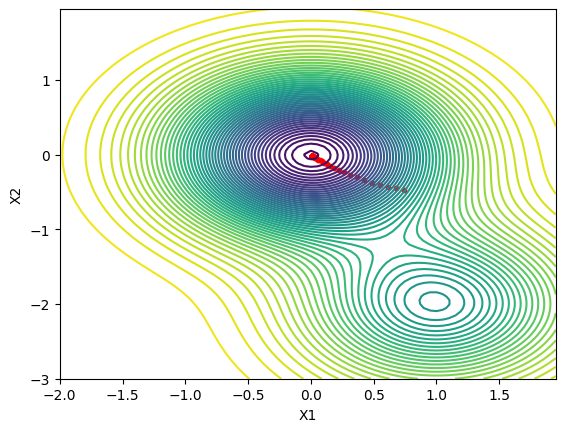

np.float64(0.4966391898196642)

In [23]:
Example2.set_alpha(0.1)
Example2.minimize(np.random.uniform(-2, 2), np.random.uniform(-3, 2), steps=100, verbose=1, plot=True)

Step 0: x1 = -0.4271, x2 = -2.8299, f(x1, x2) = 1.4670
Step 1: x1 = -0.3335, x2 = -2.7748, f(x1, x2) = 1.4532
Step 2: x1 = -0.2097, x2 = -2.7018, f(x1, x2) = 1.4286
Step 3: x1 = -0.0385, x2 = -2.6008, f(x1, x2) = 1.3803
Step 4: x1 = 0.2078, x2 = -2.4554, f(x1, x2) = 1.2808
Step 5: x1 = 0.5510, x2 = -2.2521, f(x1, x2) = 1.1118
Step 6: x1 = 0.8929, x2 = -2.0483, f(x1, x2) = 1.0001
Step 7: x1 = 0.9925, x2 = -1.9868, f(x1, x2) = 0.9929
Step 8: x1 = 0.9928, x2 = -1.9857, f(x1, x2) = 0.9929
Step 9: x1 = 0.9928, x2 = -1.9856, f(x1, x2) = 0.9929


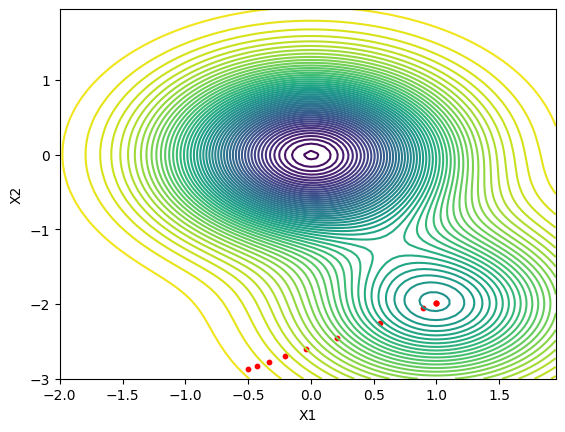

np.float64(0.9928909759949441)

In [24]:
Example2.set_alpha(0.5)
Example2.minimize(np.random.uniform(-2, 2), np.random.uniform(-3, 2), steps=10, verbose=1, plot=True)